<H1> ML Learning </H1>

In [679]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [680]:
#load dataset
df = pd.read_csv('/Users/Ryan/Code/PythonLearning/ML/insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


The Medical Insurance Cost dataset contains information about individuals’ demographic, lifestyle, and health-related factors, along with their corresponding medical insurance charges. It is typically used for predictive modeling, statistical analysis, and machine learning tasks such as regression.

Common Columns in the Dataset

Age:Age of the insured person (in years).
- Sex:Gender of the insured individual (male/female).
- BMI Body Mass Index: a measure of body fat based on height and weight.
- Children: Number of dependents covered by the insurance (e.g., 0, 1, 2, etc.).
- Smoker: Smoking status of the person (yes/no).
- Region: Residential area of the insured (e.g., northeast, northwest, southeast, southwest).
- Charges: Final medical insurance cost billed by the insurance company


In [681]:
#Data Preprocessing 

#Change smoker to Yes = 1 and No = 0 so it is easier for computer
df['smoker'] = np.where(df['smoker'] == 'yes', 1, 0)

#Change sex to Male = 1 and Female = 0 so it is easier for computer
df['sex'] = np.where(df['sex'] == 'male', 1, 0)

In [682]:
#Check if there is any nulls 
for column in df:
    count = 0
    if df[column].isnull() is True:
        count +=1
    else:
        print(column+": no nulls")

age: no nulls
sex: no nulls
bmi: no nulls
children: no nulls
smoker: no nulls
region: no nulls
charges: no nulls


In [683]:
#Check to to see all the unique values in region
print(df['region'].unique())


['southwest' 'southeast' 'northwest' 'northeast']


In [684]:
#Gain more information about dataset including range and averages
df.describe()

,age,sex,bmi,children,smoker,charges
count,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,0.505232,30.663397,1.094918,0.204783,13270.422265
std,14.049960,0.500160,6.098187,1.205493,0.403694,12110.011237
min,18.000000,0.000000,15.960000,0.000000,0.000000,1121.873900
25%,27.000000,0.000000,26.296250,0.000000,0.000000,4740.287150
50%,39.000000,1.000000,30.400000,1.000000,0.000000,9382.033000
75%,51.000000,1.000000,34.693750,2.000000,0.000000,16639.912515
max,64.000000,1.000000,53.130000,5.000000,1.000000,63770.428010


Age:
- Range is 18 years old to 64 years old
- Average age is 39

Sex
- All values changed to 0 and 1
- Very balanced dataset with a mean of .5 meaning that there is an even split of male and female.

BMI
- Range is 15.96 BMI - 53.13 which is surprising.  BMI below 15 is very skinny. BMI over 30 is typically seen as Obese.
- Mean is 30 meaning that the average person in this data is classified as obese. 

Children
- Range is 0 children to 5 children.
- Mean is 1.09 meaning that the average person has just about 1 child. 

Smoker
- Range shows that all values changed to 0 and 1
- Mean is .2 meaning that there are more non-smokers than smokers in the dataset.

Charges:
- Range is 1,121.87 - 63,770.42 meaning there is a large range in insurance costs. 

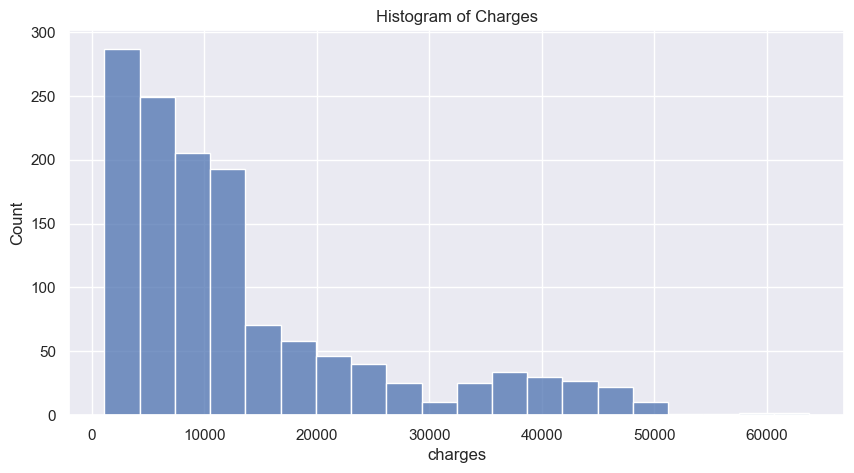

In [685]:
#Plot Charges In Histogram To See Distribution
plt.figure(figsize=(10,5))
sns.histplot(df['charges'], bins = 20)
plt.title('Histogram of Charges')
plt.show()

The histogram of charges is left skewed. This means that the majority of people are being charged less than 20,000. 

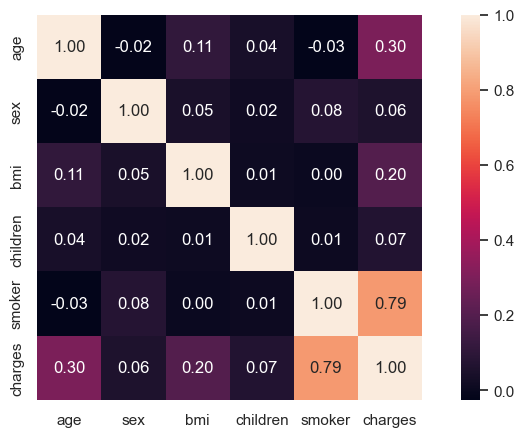

In [686]:
#Make dataframe that only contains numeric data types
df_numeric = df.select_dtypes(include=np.number)
correlation_matrix = df_numeric.columns.values

#correlation matrix visualization
plt.figure(figsize=(10,5))
cm = np.corrcoef(df[correlation_matrix].values.T)
sns.set(font_scale=1.0)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True, fmt='.2f', annot_kws={'size':12}, yticklabels=correlation_matrix, xticklabels=correlation_matrix)
plt.show()

The Age, BMI, and if they were a smoker showed to be the highest correlation to the charges variable. 

/var/folders/l2/llz9_pnx1x500g8s68zv1r8r0000gp/T/ipykernel_46003/2580721584.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='region',y='charges', data = regions, palette='coolwarm')


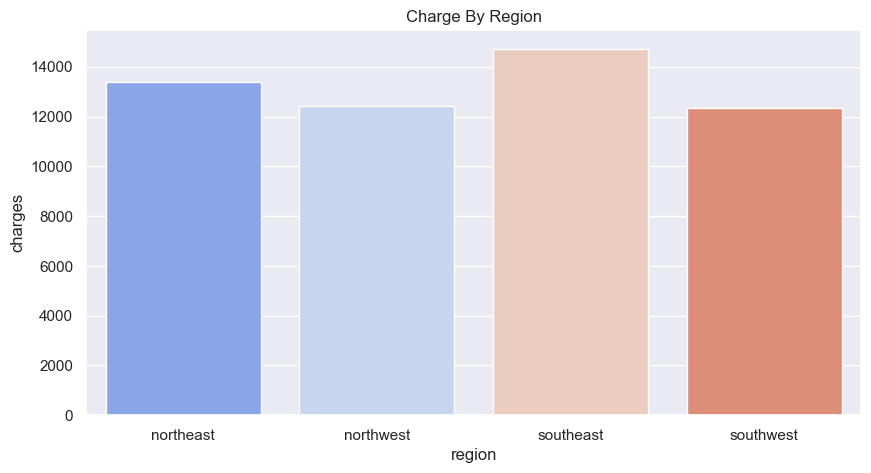

In [687]:
#Chart Average Charge By Region
regions = (df.groupby('region')['charges'].mean()).reset_index()

plt.figure(figsize=(10,5))
sns.barplot(x='region',y='charges', data = regions, palette='coolwarm')
plt.title('Charge By Region')
plt.show()

<H1> Linear Regression </H1>

In [688]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, root_mean_squared_error

In [689]:
# Split the dataset so that it only includes numerical values and so charges is the target
X = df[['age', 'sex', 'bmi', 'children','smoker']]
y = df['charges']

In [690]:
#Split the dataset 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.40, random_state = 42)

In [691]:
#Define the model
model = linear_model.LinearRegression()


In [692]:
#Fit the model
model.fit(X_train, y_train)

LinearRegression()

In [693]:
#Make predictions
Y_pred = model.predict(X_test)

In [694]:
MSE = mean_squared_error(y_test, Y_pred)

RMSE = root_mean_squared_error(y_test, Y_pred)

print('The mean squared error is $' + str(MSE.round(2)))
print('The root mean squared error is $' + str(RMSE.round(2)))

The mean squared error is $35710618.69
The root mean squared error is $5975.84


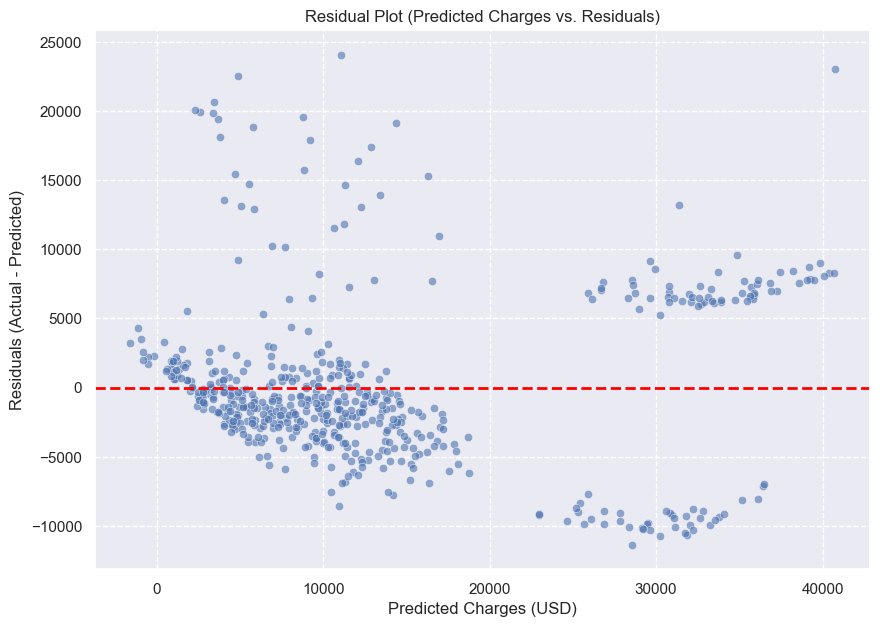

In [695]:
#Residual Plot
plt.figure(figsize=(10, 7))
residuals = y_test - Y_pred
sns.scatterplot(x=Y_pred, y=residuals, alpha=0.6)
plt.axhline(y=0, color='red', linestyle='--', linewidth=2)
plt.title('Residual Plot (Predicted Charges vs. Residuals)')
plt.xlabel('Predicted Charges (USD)')
plt.ylabel('Residuals (Actual - Predicted)')
plt.grid(True, linestyle='--')
plt.show() # Or plt.savefig()

<H1> Logistic Regression </h1>

In [696]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import StandardScaler

In [697]:
#Create new target variable where target is true if the charges are 20000 or more. 
df['Target'] = (df['charges'] >=20000).astype(int)

In [698]:
df.head()

,age,sex,bmi,children,smoker,region,charges,Target
0,19,0,27.900,0,1,southwest,16884.92400,0
1,18,1,33.770,1,0,southeast,1725.55230,0
2,28,1,33.000,3,0,southeast,4449.46200,0
3,33,1,22.705,0,0,northwest,21984.47061,1
4,32,1,28.880,0,0,northwest,3866.85520,0


In [699]:
#See the balance of the target variable. 
print(Counter(df['Target']))

Counter({0: 1065, 1: 273})


The variable is unbalanced with 273 large charges and 1065 smaller charges. 

In [700]:
#Split the dataset
X1 = df[['age', 'sex', 'bmi', 'children','smoker']]
Y1 = df['Target']

#Split the dataset 
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, Y1, test_size = .40, random_state = 42)

In [701]:
#Balance the training data
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X1_train, y1_train)

print("Resampled training dataset shape:", Counter(y_train_resampled))


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)


Resampled training dataset shape: Counter({0: 640, 1: 640})


In [ ]:
model = LogisticRegression(max_iter=1000)

In [713]:
model.fit(X_train_scaled, y_train_resampled)

LogisticRegression(max_iter=10000)

In [714]:
#Make predictions
Y_pred = model.predict(X_test_scaled)

In [716]:
# Classification results
print("Classification Report:")
print(classification_report(y1_test, Y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.90      0.92       425
           1       0.67      0.78      0.72       111

    accuracy                           0.88       536
   macro avg       0.81      0.84      0.82       536
weighted avg       0.88      0.88      0.88       536



<H1> SVM </H1>

In [706]:
from sklearn.svm import SVC

In [707]:
# Train a non-linear SVM (SVC) model
model = SVC(kernel='rbf')
model.fit(X_train_scaled, y_train_resampled)


SVC()

In [711]:
# Make predictions on the training and test data
y_test_pred = model.predict(X_test_scaled)



In [710]:
# Classification results
print("Classification Report:")
print(classification_report(y1_test, y_test_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.94      0.98      0.96       425
           1       0.90      0.76      0.82       111

    accuracy                           0.93       536
   macro avg       0.92      0.87      0.89       536
weighted avg       0.93      0.93      0.93       536

